In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [5]:
zomato=pd.read_csv(r"C:\Users\karthik\Desktop\code\ZOMATO\zomato.csv",sep=',', encoding='latin-1')
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
zomato.shape

(51717, 17)

In [15]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23259 entries, 0 to 23258
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            23259 non-null  int64 
 1   url              23259 non-null  object
 2   address          23259 non-null  object
 3   name             23259 non-null  object
 4   online_order     23259 non-null  object
 5   book_table       23259 non-null  object
 6   rate             23259 non-null  object
 7   votes            23259 non-null  int64 
 8   phone            23046 non-null  object
 9   location         23259 non-null  object
 10  rest_type        23259 non-null  object
 11  dish_liked       23259 non-null  object
 12  cuisines         23259 non-null  object
 13  cost_for_2       23259 non-null  object
 14  reviews_list     23259 non-null  object
 15  menu_item        23259 non-null  object
 16  listed_in(type)  23259 non-null  object
 17  listed_in(city)  23259 non-null

In [7]:
zomato = zomato[pd.notnull(zomato['dish_liked'])]
zomato['dish_liked'] = zomato['dish_liked'].str.replace(',', '')

zomato = zomato[pd.notnull(zomato['rate'])]
zomato['rate'] = zomato['rate'].str.replace(' ', '')
zomato = zomato[zomato['rate'] != 'NEW']
zomato = zomato[zomato['rate'] != '-']

zomato = zomato[pd.notnull(zomato['rest_type'])]
zomato['rest_type'] = zomato['rest_type'].str.replace(',', '')

zomato = zomato[pd.notnull(zomato['cuisines'])]
zomato['cuisines'] = zomato['cuisines'].str.replace(',', '')

zomato = zomato[pd.notnull(zomato['location'])]
zomato['location'] = zomato['location'].str.replace(',', '')

zomato = zomato[pd.notnull(zomato['approx_cost(for two people)'])]
zomato['approx_cost(for two people)'].replace(np.NaN, zomato['approx_cost(for two people)'].mode())

zomato = zomato.rename(columns={"approx_cost(for two people)":"cost_for_2"})
zomato.reset_index(inplace = True)

zomato.shape

(23259, 18)

In [8]:
zomato.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'cost_for_2', 'reviews_list', 'menu_item', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [9]:
zomato['phone'] = zomato['phone'].str.replace(' ', '')
zomato['phone'] = zomato['phone'].str.replace('+', ' ')
zomato['phone'] = zomato['phone'].str.replace('\r', '')
zomato['phone'] = zomato['phone'].str.replace('\n', '')

In [66]:
rest_type = zomato['rest_type']
rest_type1=rest_type.str.split(n=1, expand=True)
rest_type1.columns=['rest_type_1','rest_type_2']# renaming the columns

In [67]:
rest_type1

,rest_type_1,rest_type_2
0,Casual,Dining
1,Casual,Dining
2,Cafe,Casual Dining
3,Quick,Bites
4,Casual,Dining
...,...,...
23254,Bar,Casual Dining
23255,Fine,Dining Bar
23256,Casual,Dining Bar
23257,Casual,Dining Bar


In [68]:
rest_type1.shape

(23259, 2)

In [69]:
dish = zomato['dish_liked']# splitting the column 'dish_liked' into multiple columns 
dish_liked=dish.str.split(n=6, expand=True)
dish_liked.columns = ['dish_liked_1','dish_liked_2','dish_liked_3','dish_liked_4','dish_liked_5','dish_liked_6','dish_liked_7']# renaming the columns
dish_liked.head()

,dish_liked_1,dish_liked_2,dish_liked_3,dish_liked_4,dish_liked_5,dish_liked_6,dish_liked_7
0,Pasta,Lunch,Buffet,Masala,Papad,Paneer,Lajawab Tomato Shorba Dum Biryani Sweet Corn Soup
1,Momos,Lunch,Buffet,Chocolate,Nirvana,Thai,Green Curry Paneer Tikka Dum Biryani Chicken B...
2,Churros,Cannelloni,Minestrone,Soup,Hot,Chocolate,Pink Sauce Pasta Salsa Veg Supreme Pizza
3,Masala,Dosa,None,None,None,None,None
4,Panipuri,Gol,Gappe,None,None,None,None


In [70]:
cuisines1 = zomato['cuisines'] # splitting the column 'dish_liked' into multiple columns
cuisines=cuisines1.str.split(n=7, expand=True)
cuisines.columns = ['cuisines_1','cuisines_2','cuisines_3','cuisines_4','cuisines_5','cuisines_6','cuisines_7','cuisines_8']# renaming the columns
cuisines.head()

,cuisines_1,cuisines_2,cuisines_3,cuisines_4,cuisines_5,cuisines_6,cuisines_7,cuisines_8
0,North,Indian,Mughlai,Chinese,None,None,None,None
1,Chinese,North,Indian,Thai,None,None,None,None
2,Cafe,Mexican,Italian,None,None,None,None,None
3,South,Indian,North,Indian,None,None,None,None
4,North,Indian,Rajasthani,None,None,None,None,None


In [71]:
result = pd.concat([zomato, rest_type1, dish_liked, cuisines], axis=1) #concating the all dataframes
result.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,...,dish_liked_6,dish_liked_7,cuisines_1,cuisines_2,cuisines_3,cuisines_4,cuisines_5,cuisines_6,cuisines_7,cuisines_8
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,08042297555 919743772233,Banashankari,...,Paneer,Lajawab Tomato Shorba Dum Biryani Sweet Corn Soup,North,Indian,Mughlai,Chinese,None,None,None,None
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,08041714161,Banashankari,...,Thai,Green Curry Paneer Tikka Dum Biryani Chicken B...,Chinese,North,Indian,Thai,None,None,None,None
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,919663487993,Banashankari,...,Chocolate,Pink Sauce Pasta Salsa Veg Supreme Pizza,Cafe,Mexican,Italian,None,None,None,None,None
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,919620009302,Banashankari,...,None,None,South,Indian,North,Indian,None,None,None,None
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,918026612447 919901210005,Basavanagudi,...,None,None,North,Indian,Rajasthani,None,None,None,None,None


In [72]:
df =result.drop(['index','url','phone','address','menu_item','rest_type','rest_type_2','dish_liked','dish_liked_2','dish_liked_3','dish_liked_4','reviews_list','dish_liked_5','dish_liked_6','dish_liked_7','cuisines','cuisines_2','cuisines_3','cuisines_4','cuisines_5','cuisines_6','cuisines_7','cuisines_8','listed_in(city)'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,cost_for_2,listed_in(type),rest_type_1,dish_liked_1,cuisines_1
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,800,Buffet,Casual,Pasta,North
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,800,Buffet,Casual,Momos,Chinese
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,800,Buffet,Cafe,Churros,Cafe
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,300,Buffet,Quick,Masala,South
4,Grand Village,No,No,3.8/5,166,Basavanagudi,600,Buffet,Casual,Panipuri,North


In [73]:
df['rate'] = df['rate'].str.replace('/5', '')
df['rate'] = df['rate'].str.replace(' ', '')
df = df[df['rate'] != '-']
df = df[df['rate'] != 'NEW']
df = df[pd.notnull(df['rate'])]

df = df[pd.notnull(df['cost_for_2'])]
df = df[pd.notnull(df['book_table'])]
df = df[pd.notnull(df['online_order'])]
df.head()

,name,online_order,book_table,rate,votes,location,cost_for_2,listed_in(type),rest_type_1,dish_liked_1,cuisines_1
0,Jalsa,Yes,Yes,4.1,775,Banashankari,800,Buffet,Casual,Pasta,North
1,Spice Elephant,Yes,No,4.1,787,Banashankari,800,Buffet,Casual,Momos,Chinese
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,800,Buffet,Cafe,Churros,Cafe
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,300,Buffet,Quick,Masala,South
4,Grand Village,No,No,3.8,166,Basavanagudi,600,Buffet,Casual,Panipuri,North


In [74]:
df.describe()

,votes
count,23259.000000
mean,605.388710
std,1113.483548
min,0.000000
25%,104.000000
50%,225.000000
75%,597.000000
max,16832.000000


In [75]:
le = LabelEncoder()
df = df.apply(lambda col: le.fit_transform(col))
df.corr()

,name,online_order,book_table,rate,votes,location,cost_for_2,listed_in(type),rest_type_1,dish_liked_1,cuisines_1
name,1.000000,0.015179,0.005712,0.003964,-0.006252,0.026310,0.007402,0.010845,0.009555,0.052831,0.060545
online_order,0.015179,1.000000,-0.135944,-0.037179,-0.060745,-0.098119,0.233536,-0.236674,0.043232,0.044516,-0.000709
book_table,0.005712,-0.135944,1.000000,0.354713,0.436965,0.109711,-0.471157,0.137728,-0.225031,-0.000497,-0.024708
rate,0.003964,-0.037179,0.354713,1.000000,0.465035,0.111365,-0.256525,0.042676,-0.149168,-0.006559,-0.137450
votes,-0.006252,-0.060745,0.436965,0.465035,1.000000,0.048701,-0.288401,0.093621,-0.157260,-0.053120,-0.081656
location,0.026310,-0.098119,0.109711,0.111365,0.048701,1.000000,-0.107222,0.058340,-0.079993,-0.000790,-0.012107
cost_for_2,0.007402,0.233536,-0.471157,-0.256525,-0.288401,-0.107222,1.000000,-0.202228,-0.022050,0.021274,-0.046640
listed_in(type),0.010845,-0.236674,0.137728,0.042676,0.093621,0.058340,-0.202228,1.000000,0.061069,-0.040021,0.007140
rest_type_1,0.009555,0.043232,-0.225031,-0.149168,-0.157260,-0.079993,-0.022050,0.061069,1.000000,0.010758,0.226136
dish_liked_1,0.052831,0.044516,-0.000497,-0.006559,-0.053120,-0.000790,0.021274,-0.040021,0.010758,1.000000,0.075889


In [76]:
locality_rest_type = pd.DataFrame(result[['location','rest_type_1','rest_type_2']])
locality_rest_type_stack = pd.DataFrame(locality_rest_type.stack())
locality_rest_type.head()

,location,rest_type_1,rest_type_2
0,Banashankari,Casual,Dining
1,Banashankari,Casual,Dining
2,Banashankari,Cafe,Casual Dining
3,Banashankari,Quick,Bites
4,Basavanagudi,Casual,Dining


In [77]:
keys_rest_type = [c for c in locality_rest_type  if c.startswith('rest_type')]
a_rest_type = pd.melt(locality_rest_type, id_vars='location', value_vars=keys_rest_type, value_name='rest_type') #melting the stack into one row
rest_type_stack=pd.DataFrame(a_rest_type.groupby(by=['location','variable','rest_type']).size().reset_index()) #find the highest restuarant in the city
del rest_type_stack['variable']
rest_type_stack.columns = ['location', 'rest_type', 'count']

rest_type_stack.head()

,location,rest_type,count
0,BTM,Bakery,15
1,BTM,Bar,12
2,BTM,Beverage,25
3,BTM,Cafe,159
4,BTM,Casual,424


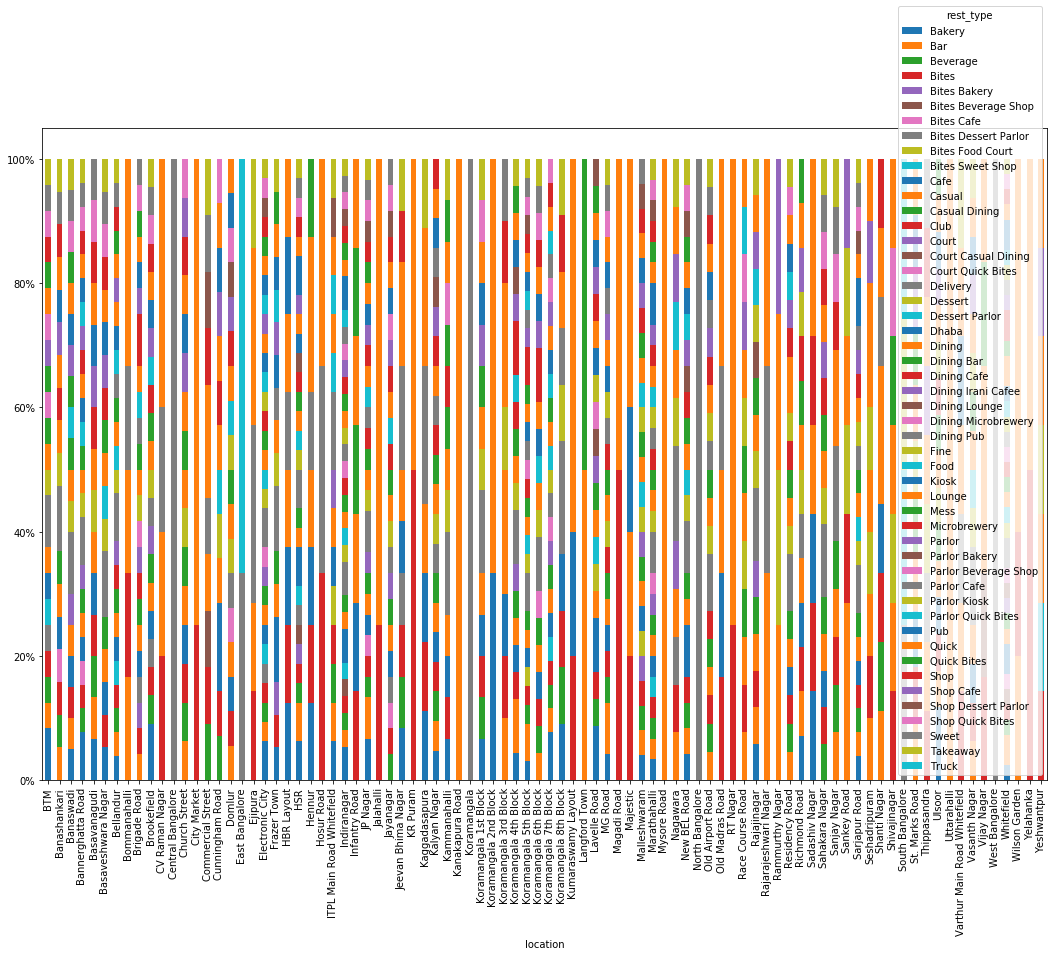

In [79]:
rest_type_stack.groupby(['location', 'rest_type']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(figsize=(18,12), kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

In [90]:
rest_type_pivot = rest_type_stack.pivot_table('count', 'location', 'rest_type')
rest_type_pivot.fillna(0, inplace = True)
rest_type_pivot.head()

rest_type,Bakery,Bar,Beverage,Bites,Bites Bakery,Bites Beverage Shop,Bites Cafe,Bites Dessert Parlor,Bites Food Court,Bites Sweet Shop,...,Pub,Quick,Quick Bites,Shop,Shop Cafe,Shop Dessert Parlor,Shop Quick Bites,Sweet,Takeaway,Truck
location,,,,,,,,,,,,,,,,,,,,,
BTM,14.0,12.0,25.0,609.0,0.0,0.0,0.0,8.0,0.0,7.0,...,0.0,624.0,12.0,18.0,0.0,0.0,35.0,28.0,49.0,0.0
Banashankari,0.0,12.0,3.0,131.0,0.0,0.0,3.0,0.0,0.0,0.0,...,6.0,134.0,0.0,6.0,0.0,0.0,0.0,3.0,3.0,0.0
Banaswadi,4.0,5.0,0.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,67.0,6.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0
Bannerghatta Road,11.0,0.0,5.0,140.0,0.0,0.0,4.0,0.0,0.0,0.0,...,17.0,144.0,0.0,2.0,0.0,0.0,5.0,2.0,13.0,0.0
Basavanagudi,6.0,6.0,5.0,136.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,136.0,0.0,5.0,0.0,0.0,2.0,2.0,0.0,0.0


In [91]:
rest_type_np = rest_type_pivot.to_numpy(dtype=int)
rest_type_np = rest_type_np.transpose()

In [92]:
rest_type_names = [c for c in rest_type_pivot  if c.startswith('')]

In [93]:
location_names = rest_type_stack['location'].unique()
location_names = location_names.tolist()

In [ ]:
fig, ax = plt.subplots(figsize=(40,20))
im = ax.imshow(rest_type_np)

# We want to show all ticks...
ax.set_xticks(np.arange(len(location_names)))
ax.set_yticks(np.arange(len(rest_type_names)))
# ... and label them with the respective list entries
ax.set_xticklabels(location_names, fontsize = 20)
ax.set_yticklabels(rest_type_names, fontsize = 20)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(rest_type_names)):
    for j in range(len(location_names)):
        text = ax.text(j, i, rest_type_np[i, j], ha="center", va="center", color="w")

ax.set_title("rest type of location (in count)")
fig.tight_layout()
plt.show()

In [84]:
locality_dish_liked = pd.DataFrame(result[['location','dish_liked_1','dish_liked_2','dish_liked_3','dish_liked_4','dish_liked_5','dish_liked_6','dish_liked_7']])
locality_dish_liked_stack = pd.DataFrame(locality_dish_liked.stack())
locality_dish_liked.head()

,location,dish_liked_1,dish_liked_2,dish_liked_3,dish_liked_4,dish_liked_5,dish_liked_6,dish_liked_7
0,Banashankari,Pasta,Lunch,Buffet,Masala,Papad,Paneer,Lajawab Tomato Shorba Dum Biryani Sweet Corn Soup
1,Banashankari,Momos,Lunch,Buffet,Chocolate,Nirvana,Thai,Green Curry Paneer Tikka Dum Biryani Chicken B...
2,Banashankari,Churros,Cannelloni,Minestrone,Soup,Hot,Chocolate,Pink Sauce Pasta Salsa Veg Supreme Pizza
3,Banashankari,Masala,Dosa,None,None,None,None,None
4,Basavanagudi,Panipuri,Gol,Gappe,None,None,None,None


In [95]:
locality_dish_liked = pd.DataFrame(result[['location','dish_liked_1','dish_liked_2','dish_liked_3','dish_liked_4','dish_liked_5','dish_liked_6','dish_liked_7']])
locality_dish_liked_stack = pd.DataFrame(locality_dish_liked.stack())
locality_dish_liked.head()

,location,dish_liked_1,dish_liked_2,dish_liked_3,dish_liked_4,dish_liked_5,dish_liked_6,dish_liked_7
0,Banashankari,Pasta,Lunch,Buffet,Masala,Papad,Paneer,Lajawab Tomato Shorba Dum Biryani Sweet Corn Soup
1,Banashankari,Momos,Lunch,Buffet,Chocolate,Nirvana,Thai,Green Curry Paneer Tikka Dum Biryani Chicken B...
2,Banashankari,Churros,Cannelloni,Minestrone,Soup,Hot,Chocolate,Pink Sauce Pasta Salsa Veg Supreme Pizza
3,Banashankari,Masala,Dosa,None,None,None,None,None
4,Basavanagudi,Panipuri,Gol,Gappe,None,None,None,None


In [96]:
keys_dish_liked = [c for c in locality_dish_liked  if c.startswith('dish_liked')]
a_dish_liked = pd.melt(locality_dish_liked, id_vars='location', value_vars=keys_dish_liked, value_name='dish_liked') #melting the stack into one row
dish_liked_stack=pd.DataFrame(a_dish_liked.groupby(by=['location','variable','dish_liked']).size().reset_index()) #find the highest restuarant in the city
del dish_liked_stack['variable']
dish_liked_stack.columns = ['location', 'dish_liked', 'count']

In [97]:
dish_liked_stack.head()

,location,dish_liked,count
0,BTM,Aloo,10
1,BTM,Ambur,3
2,BTM,Appam,8
3,BTM,Apple,4
4,BTM,Beef,21


In [99]:
locality_cuisines=pd.DataFrame(result[['location','cuisines_1','cuisines_2','cuisines_3','cuisines_4','cuisines_5','cuisines_6','cuisines_7','cuisines_8']])
locality_cuisines_stack=pd.DataFrame(locality_cuisines.stack()) #stacking the columns 
locality_cuisines.head()

,location,cuisines_1,cuisines_2,cuisines_3,cuisines_4,cuisines_5,cuisines_6,cuisines_7,cuisines_8
0,Banashankari,North,Indian,Mughlai,Chinese,None,None,None,None
1,Banashankari,Chinese,North,Indian,Thai,None,None,None,None
2,Banashankari,Cafe,Mexican,Italian,None,None,None,None,None
3,Banashankari,South,Indian,North,Indian,None,None,None,None
4,Basavanagudi,North,Indian,Rajasthani,None,None,None,None,None


In [100]:
keys_cuisines = [c for c in locality_cuisines  if c.startswith('cuisine')]
a_cuisines = pd.melt(locality_cuisines, id_vars='location', value_vars=keys_cuisines, value_name='cuisines') #melting the stack into one row
cuisines_stack = pd.DataFrame(a_cuisines.groupby(by=['location','variable','cuisines']).size().reset_index()) #find the highest restuarant in the city
del cuisines_stack['variable']
cuisines_stack.columns = ['location', 'cuisines', 'count']

In [101]:
cuisines_stack.shape

(6042, 3)

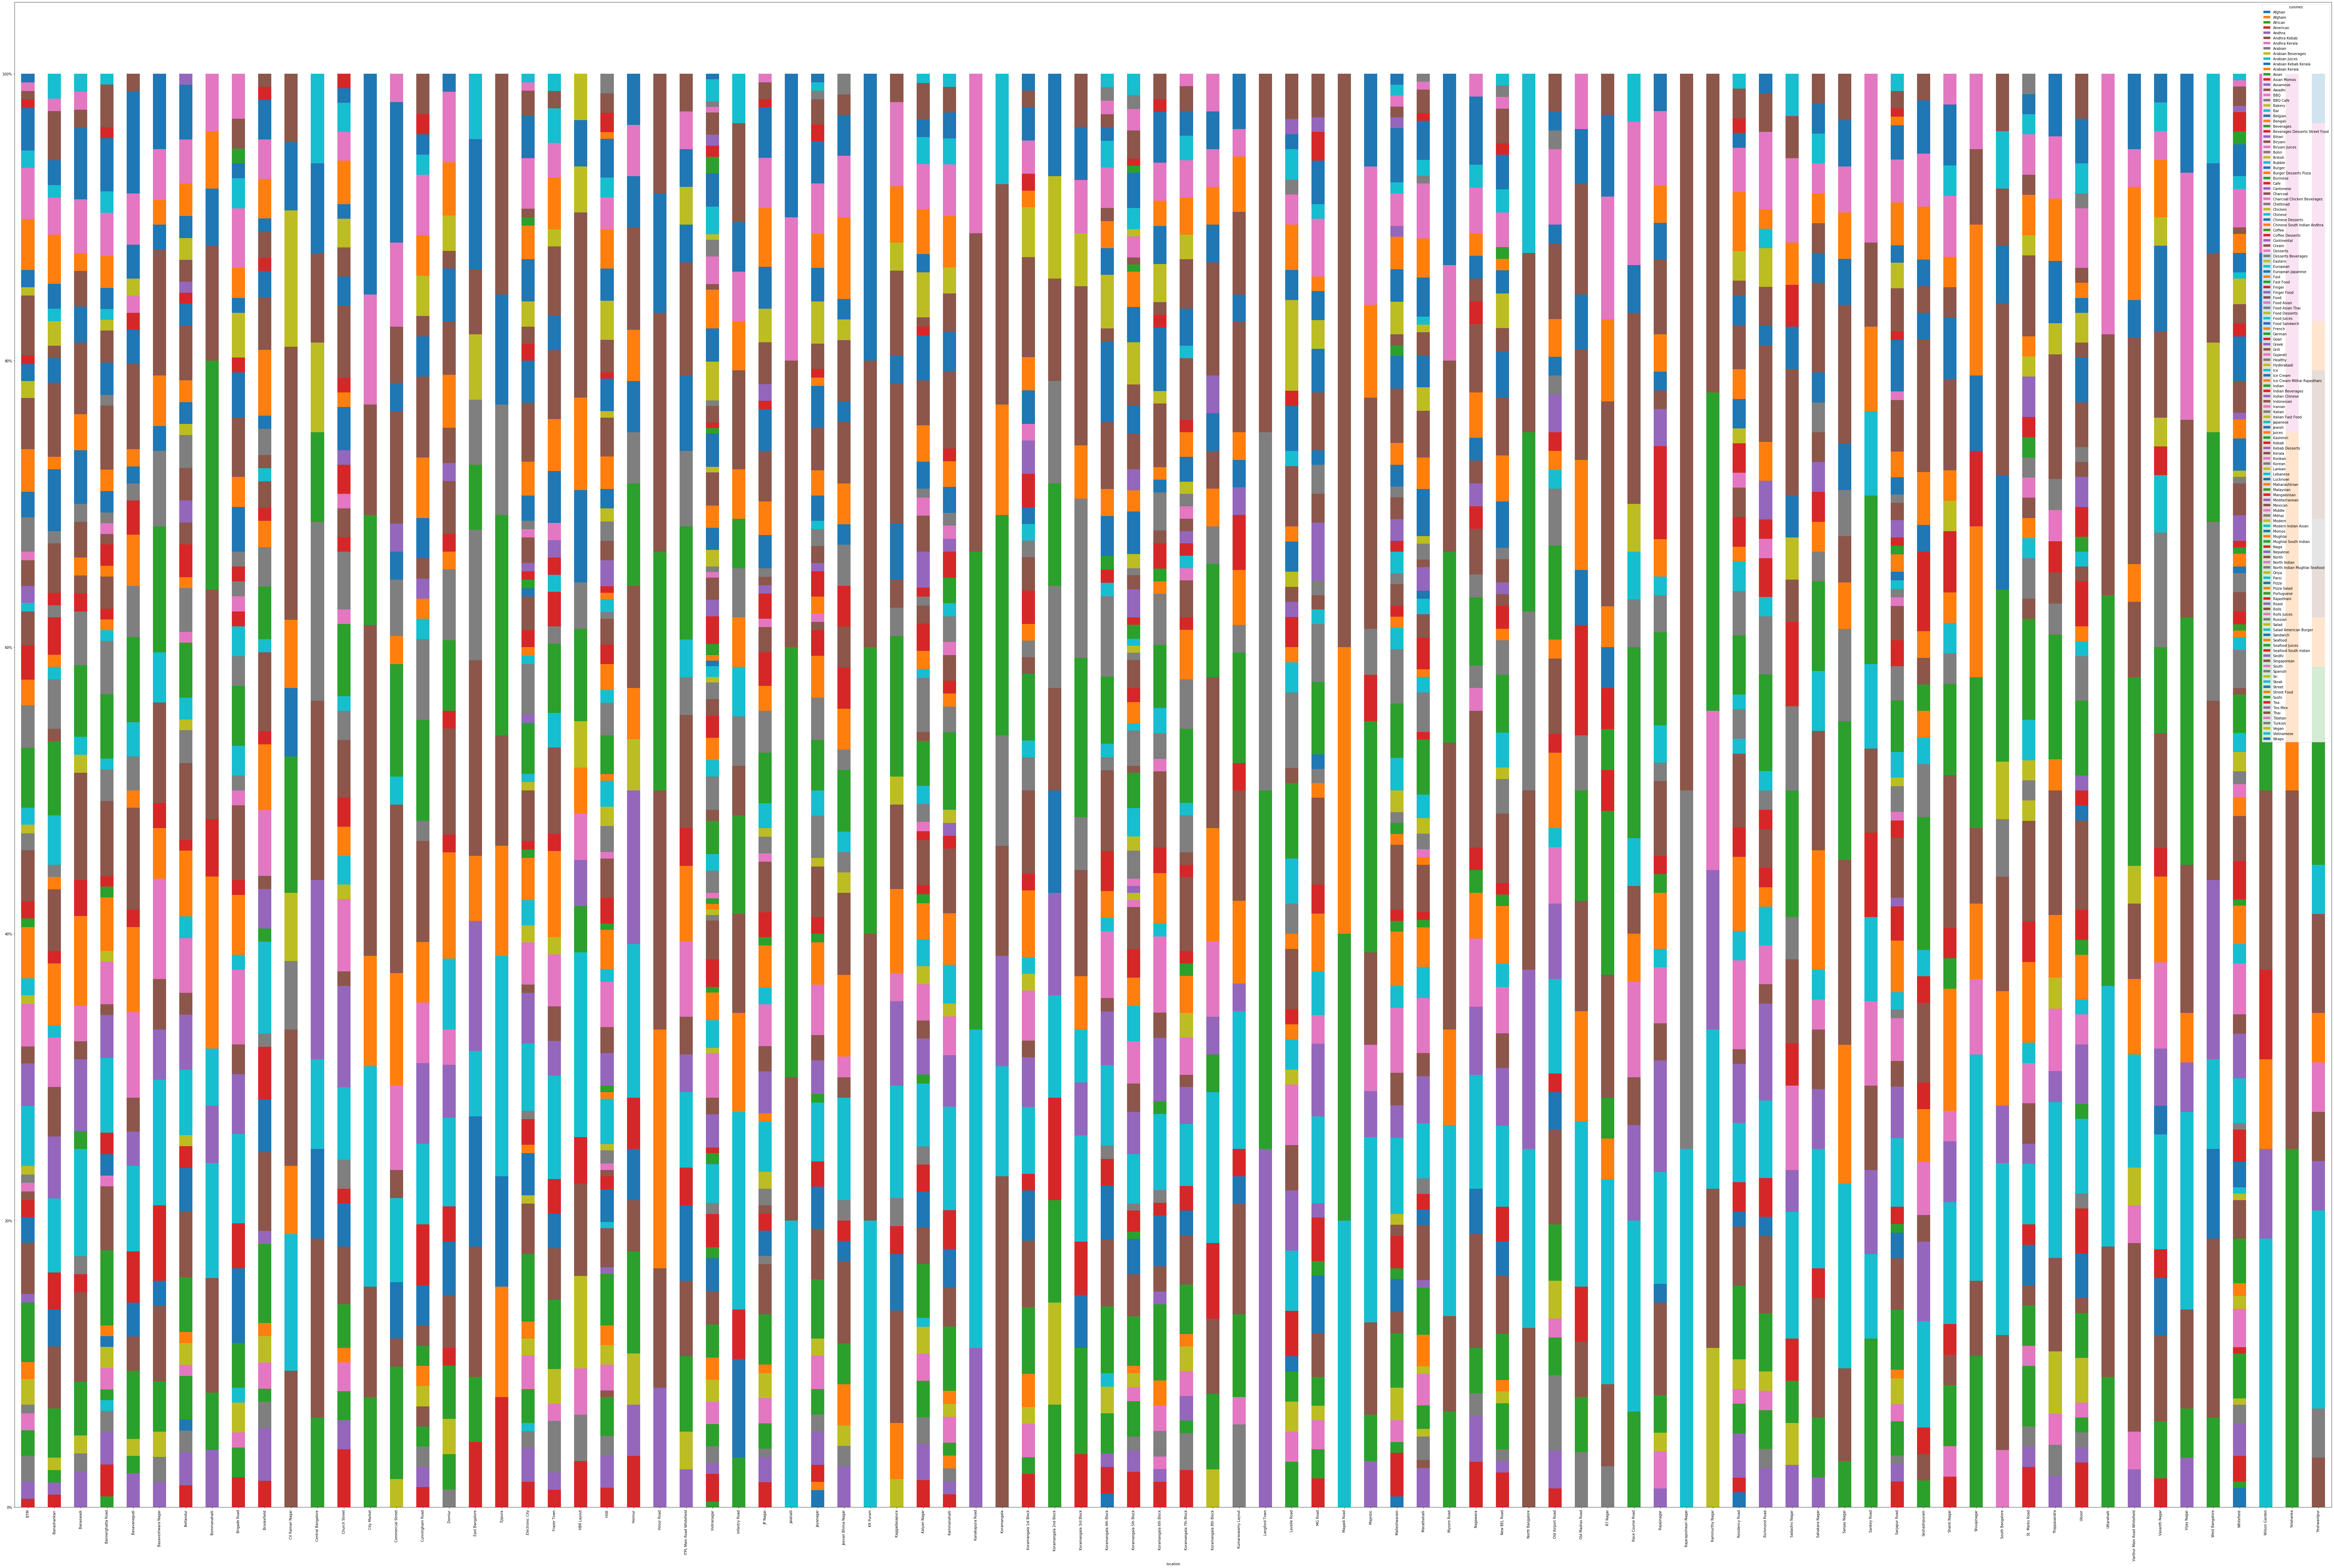

In [102]:
cuisines_stack.groupby(['location', 'cuisines']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(figsize=(120,80),kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

In [85]:
keys_dish_liked = [c for c in locality_dish_liked  if c.startswith('dish_liked')]
a_dish_liked = pd.melt(locality_dish_liked, id_vars='location', value_vars=keys_dish_liked, value_name='dish_liked') #melting the stack into one row
dish_liked_stack=pd.DataFrame(a_dish_liked.groupby(by=['location','variable','dish_liked']).size().reset_index()) #find the highest restuarant in the city
del dish_liked_stack['variable']
dish_liked_stack.columns = ['location', 'dish_liked', 'count']

In [86]:
dish_liked_stack.head()

,location,dish_liked,count
0,BTM,Aloo,10
1,BTM,Ambur,3
2,BTM,Appam,8
3,BTM,Apple,4
4,BTM,Beef,21


In [107]:
dish_liked_pivot = dish_liked_stack.pivot_table('count', 'location', 'dish_liked')
dish_liked_pivot.fillna(0, inplace = True)
dish_liked_pivot.shape

(88, 4643)

In [108]:
dish_liked_np = dish_liked_pivot.to_numpy(dtype=int)
dish_liked_np = dish_liked_np.transpose()

In [109]:
dish_liked_names = [c for c in dish_liked_pivot  if c.startswith('')]

In [ ]:
fig, ax = plt.subplots(figsize=(80,750))
im = ax.imshow(dish_liked_np)

# We want to show all ticks...
ax.set_xticks(np.arange(len(location_names)))
ax.set_yticks(np.arange(len(dish_liked_np)))
# ... and label them with the respective list entries
ax.set_xticklabels(location_names, fontsize = 18)
ax.set_yticklabels(dish_liked_names, fontsize = 18)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(dish_liked_names)):
    for j in range(len(location_names)):
        text = ax.text(j, i, dish_liked_np[i, j], ha="center", va="center", color="w")

ax.set_title("dish liked of location (in count)")
fig.tight_layout()
plt.savefig('dish_liked_heatmap.png')

In [103]:
cuisine_pivot = cuisines_stack.pivot_table('count', 'location', 'cuisines')
cuisine_pivot.fillna(0, inplace = True)
cuisine_pivot.head()

cuisines,Afghan,Afghani,African,American,Andhra,Andhra Kebab,Andhra Kerala,Arabian,Arabian Beverages,Arabian Juices,...,Street Food,Sushi,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
location,,,,,,,,,,,,,,,,,,,,,
BTM,0.0,0.0,0.0,25.000000,29.0,0.0,0.0,22.0,0.0,0.0,...,0.0,0.0,5.0,0.0,8.0,2.0,0.0,0.0,0.0,11.0
Banashankari,0.0,0.0,0.0,2.000000,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,3.5,0.0
Banaswadi,0.0,0.0,0.0,0.000000,10.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,2.0,0.0
Bannerghatta Road,0.0,0.0,8.0,9.333333,12.0,0.0,0.0,10.0,0.0,2.0,...,0.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,5.0,0.0
Basavanagudi,0.0,0.0,0.0,0.000000,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0


In [104]:
cuisine_np = cuisine_pivot.to_numpy(dtype=int)
cuisine_np = cuisine_np.transpose()

In [105]:
cuisine_names = [c for c in cuisine_pivot  if c.startswith('')]

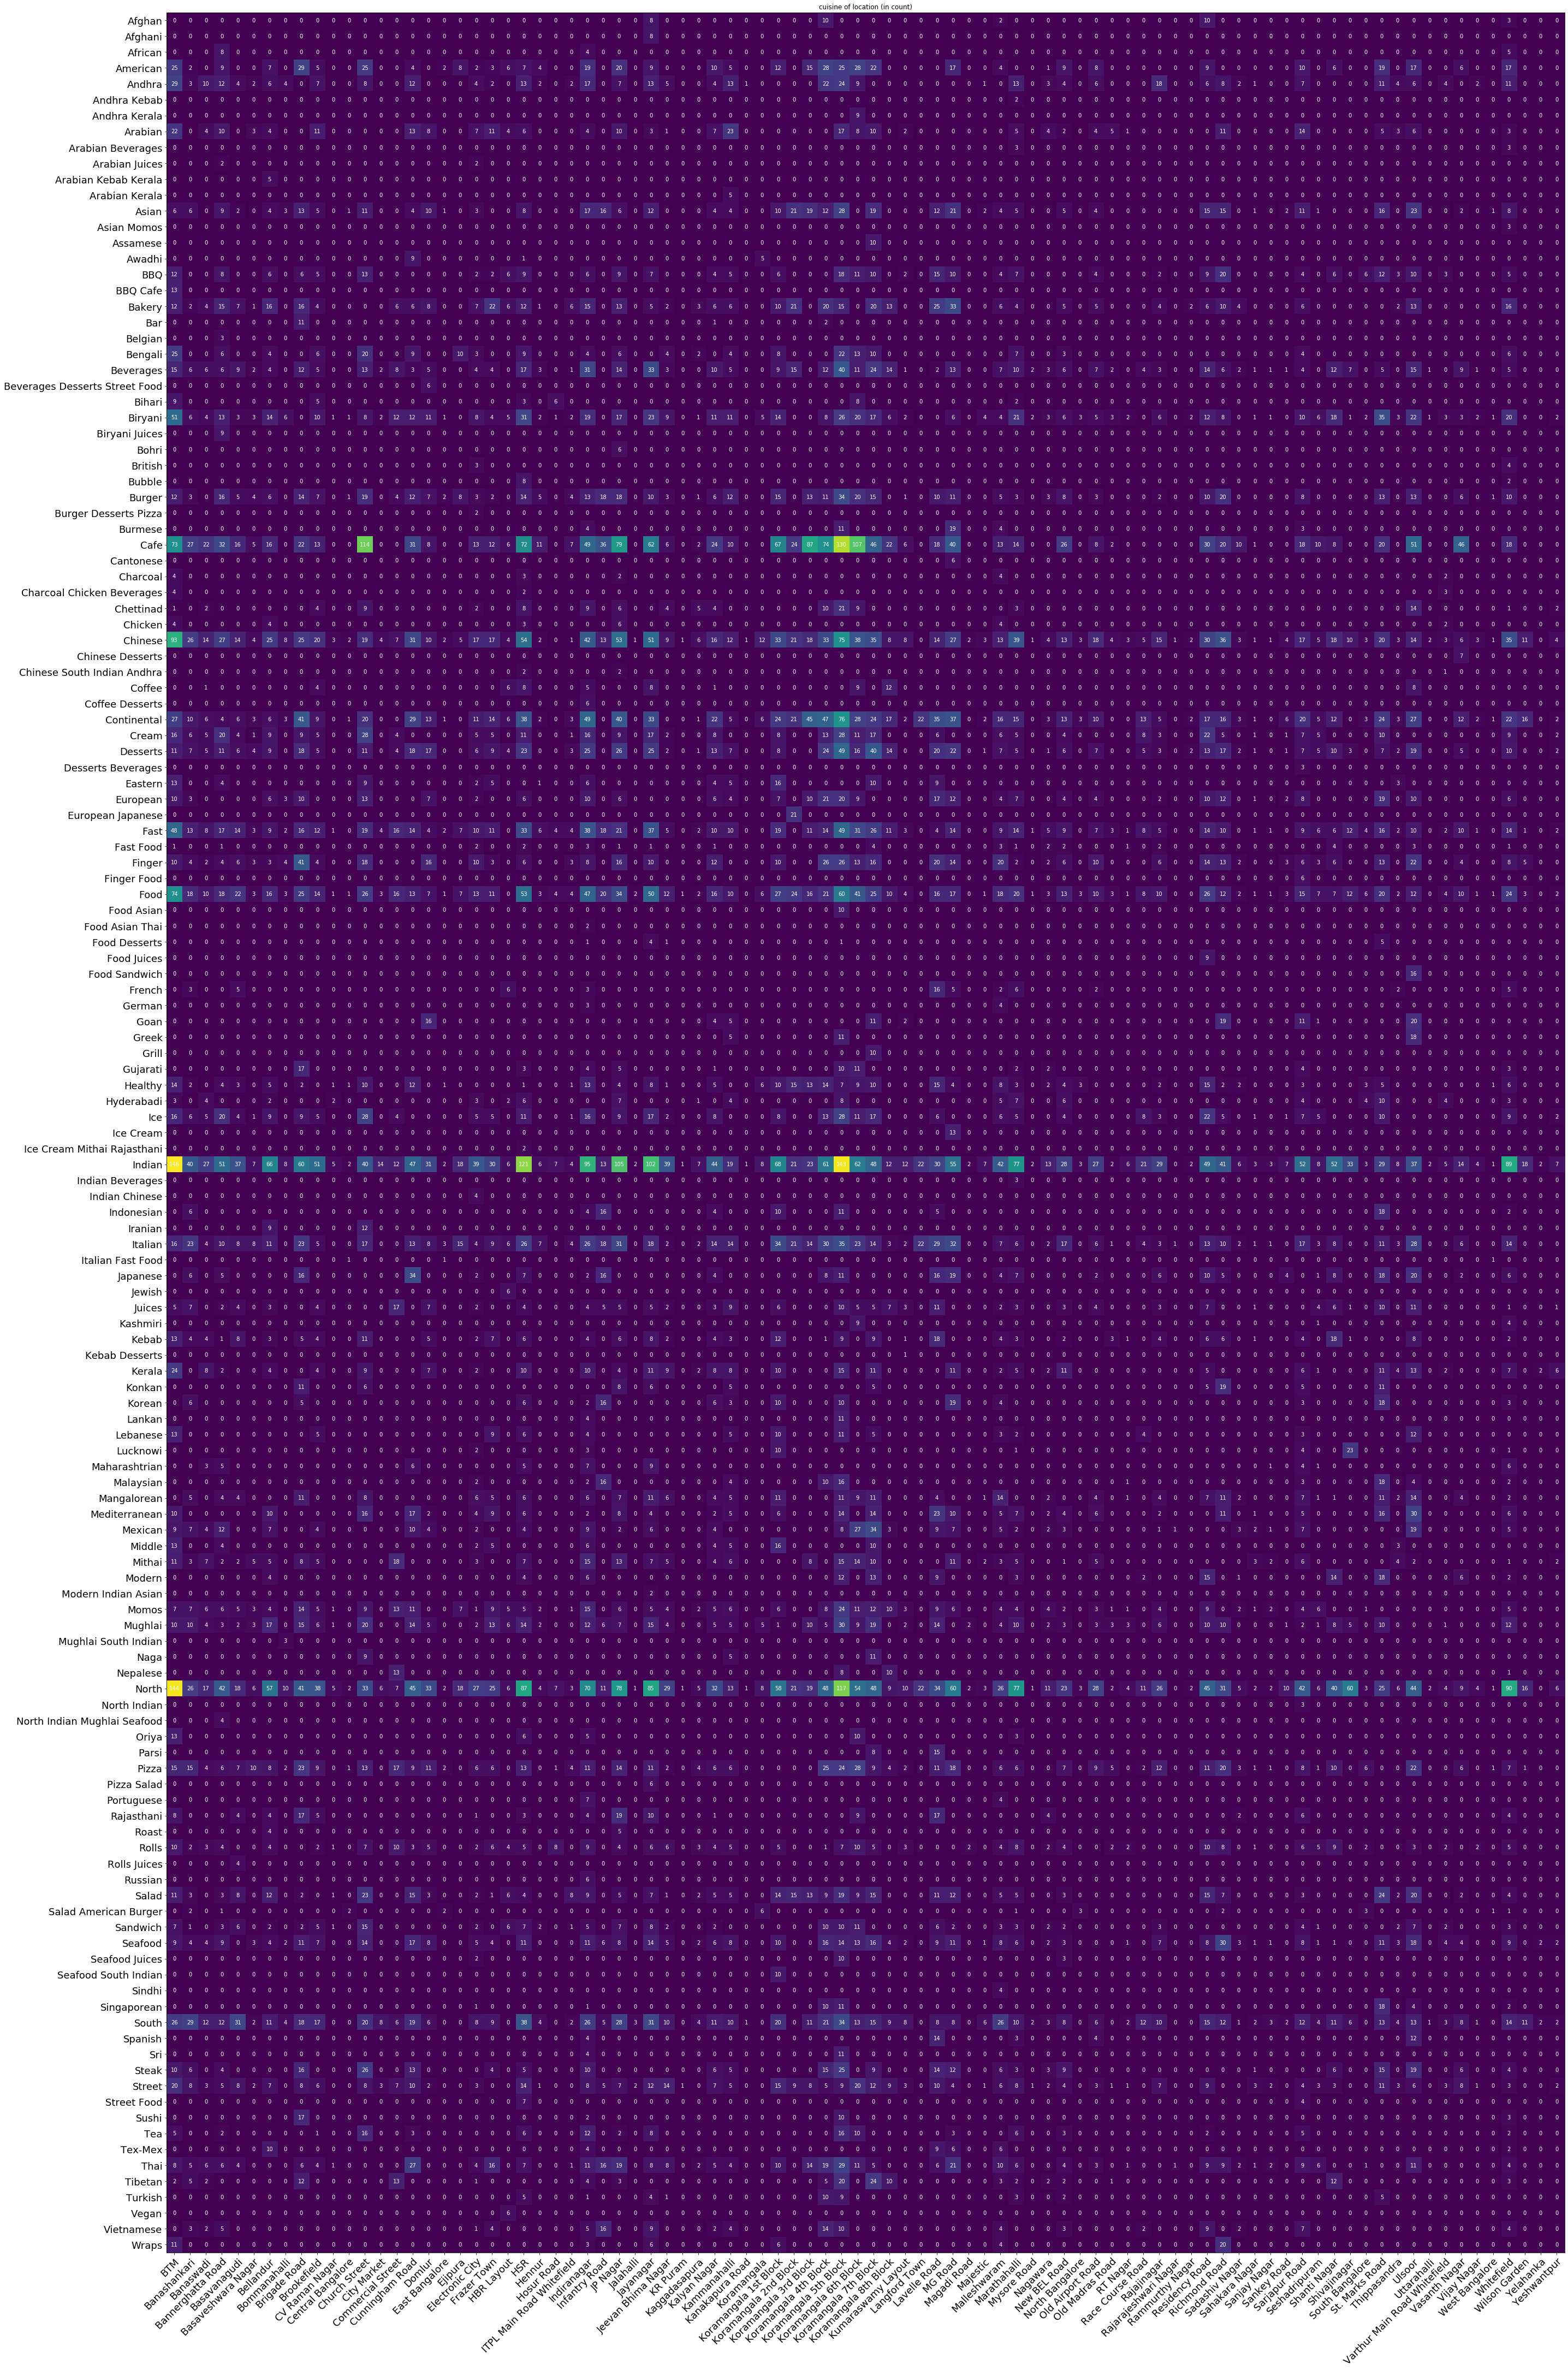

In [106]:
fig, ax = plt.subplots(figsize=(40,80))
im = ax.imshow(cuisine_np)

# We want to show all ticks...
ax.set_xticks(np.arange(len(location_names)))
ax.set_yticks(np.arange(len(cuisine_np)))
# ... and label them with the respective list entries
ax.set_xticklabels(location_names, fontsize = 18)
ax.set_yticklabels(cuisine_names, fontsize = 18)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cuisine_names)):
    for j in range(len(location_names)):
        text = ax.text(j, i, cuisine_np[i, j], ha="center", va="center", color="w")

ax.set_title("cuisine of location (in count)")
fig.tight_layout()
plt.savefig('cuisine_heatmap.png')